# ex2: Transformaciones

Buscamos resaltar las venas lo más posible

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def plot_image(img, title):
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [35]:
def plot_images(img1, title1, img2, title2):
    fig = plt.figure(figsize=(6, 7))
    
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1)
    plt.axis('off')
    plt.title(title1)

    fig.add_subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.title(title2)

    plt.subplots_adjust(wspace=0.05, hspace=0)
    plt.show()

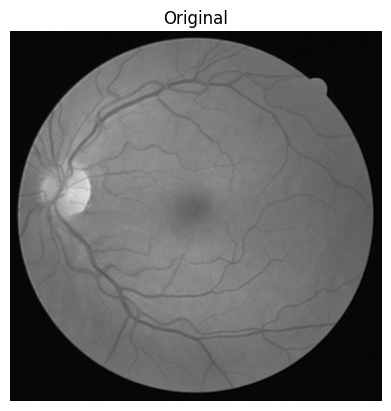

In [25]:
image = cv2.imread('assets/eyebw.jpg')
plot_image(image, "Original")

Vamos a aplicar distintas transformaciones vistas en clase

## Contrast Streching

In [23]:
def contrast_stretch(image, lower_percent, upper_percent):
    lower_value = np.percentile(image, lower_percent)
    upper_value = np.percentile(image, upper_percent)
    value_range = upper_value - lower_value
    stretched_image = (image - lower_value) * (255.0 / value_range)
    stretched_image[stretched_image < 0] = 0
    stretched_image[stretched_image > 255] = 255
    return stretched_image.astype(np.uint8)

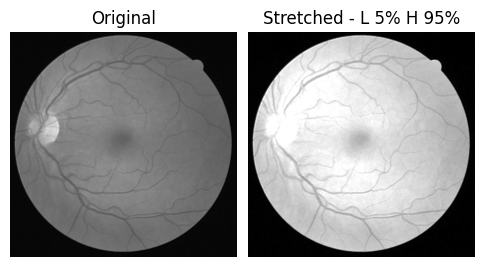

In [50]:
stretched_image = contrast_stretch(image, lower_percent=5, upper_percent=95)
plot_images(image, "Original", stretched_image, "Stretched - L 5% H 95%")

Si subimos el `lower_percent`:

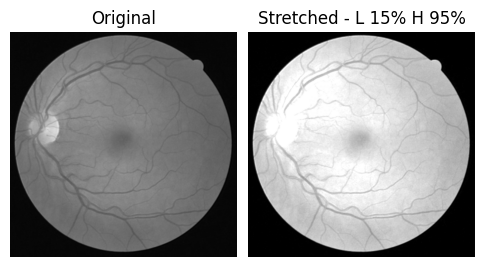

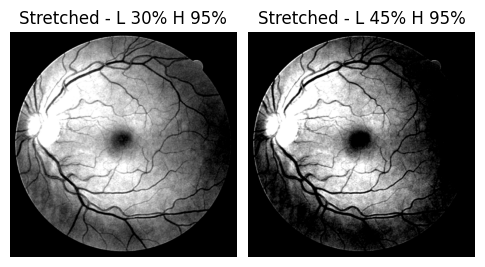

In [49]:
stretched_image = contrast_stretch(image, lower_percent=15, upper_percent=95)
plot_images(image, "Original", stretched_image, "Stretched - L 15% H 95%")
stretched_image2 = contrast_stretch(image, lower_percent=30, upper_percent=95)
stretched_image3 = contrast_stretch(image, lower_percent=45, upper_percent=95)
plot_images(stretched_image2, "Stretched - L 30% H 95%", stretched_image3, "Stretched - L 45% H 95%")

Se ven mejor las diferencias con el `lower_percent` en 30%. Aplicar esta transformación implica mapear a 0 (negro) los pixeles oscuros que caigan en ese percentil, por lo que se podría estar perdiendo información (en particular en el sector derecho). Esto es más evidente si seguimos subiendo el valor, como en el caso del 45%. Si bajamos un poco nuevamente:

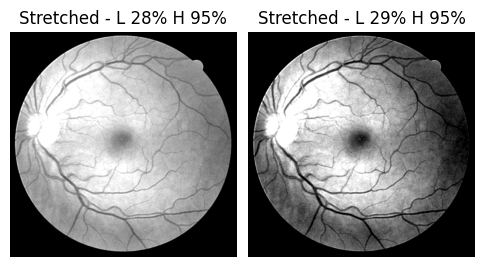

In [62]:
stretched_image4 = contrast_stretch(image, lower_percent=28, upper_percent=95)
stretched_image5 = contrast_stretch(image, lower_percent=29, upper_percent=95)
plot_images(stretched_image4, "Stretched - L 28% H 95%", stretched_image5, "Stretched - L 29% H 95%")

Podemos concluir que el mejor resultado se daría eliminando a los pixeles dentro del 28% más oscuro.

## Negativo

In [51]:
def apply_negative(image):
    negative_image = 255 - image
    return negative_image

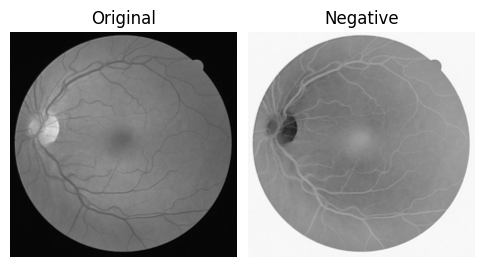

In [52]:
negative_image = apply_negative(image)
plot_images(image, "Original", negative_image, "Negative")

Esta transformación hace que las áreas oscuras pasen a ser claras, y viceversa. Esto mantiene la diferencia entre los valores originales y no ayuda a resaltar lo que queremos. Al contrario, resalta las partes más blancas de la imagen.

## Transformación logarítmica

In [141]:
def apply_logarithmic_transform(image):
    log_image = np.log10(1 + image / np.max(image))
    return log_image

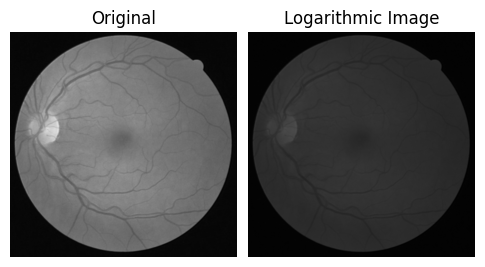

In [142]:
log_image = apply_logarithmic_transform(image)
plot_images(image, "Original", log_image, "Logarithmic Image")

Se expanden las intensidades de píxeles oscuros mientras se comprimen las intensidades mas altas, pero al tener tanto gris no se aprecia mucho.

## Transformación exponencial logarítmica

In [137]:
def apply_logaritmic_exponential_transform(image):
    log_image = np.log(1 + image)
    exponential_image = np.exp(log_image)
    return exponential_image.astype(np.uint8)

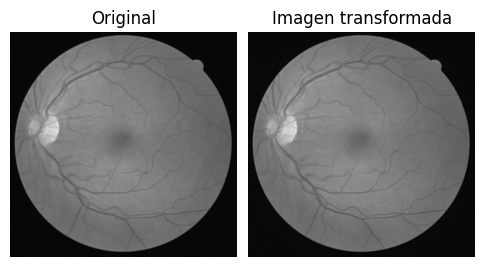

In [138]:
transformed_image = apply_logaritmic_exponential_transform(image)
plot_images(image, "Original", transformed_image, "Imagen transformada")

Da un resultado mejor que aplicando solo logaritmo.

## Compresión de niveles de gris

In [144]:
def compress_gray_levels(image, lower_threshold, upper_threshold):
    compressed_image = (image - lower_threshold) / (upper_threshold - lower_threshold) * 255
    compressed_image = np.clip(compressed_image, 0, 255)
    return compressed_image.astype(np.uint8)


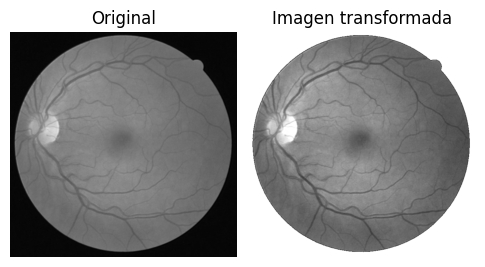

In [149]:
a = 50
b = 200
compressed_image = compress_gray_levels(image, a, b)
plot_images(image, "Original", compressed_image, "Imagen transformada")

## Contrast stretching

In [152]:
def contrast_stretching(image):
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    stretched_image = (image - min_pixel) * (255 / (max_pixel - min_pixel))
    stretched_image = np.clip(stretched_image, 0, 255)
    return stretched_image.astype(np.uint8)

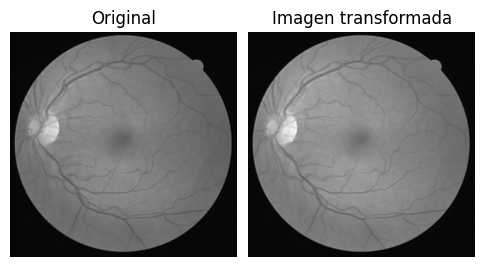

In [154]:
min_value = 0
max_value = 255
stretched_image = contrast_stretching(image)
plot_images(image, "Original", stretched_image, "Imagen transformada")